<a href="https://colab.research.google.com/github/Rakuriz07/tugasgit/blob/main/project5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

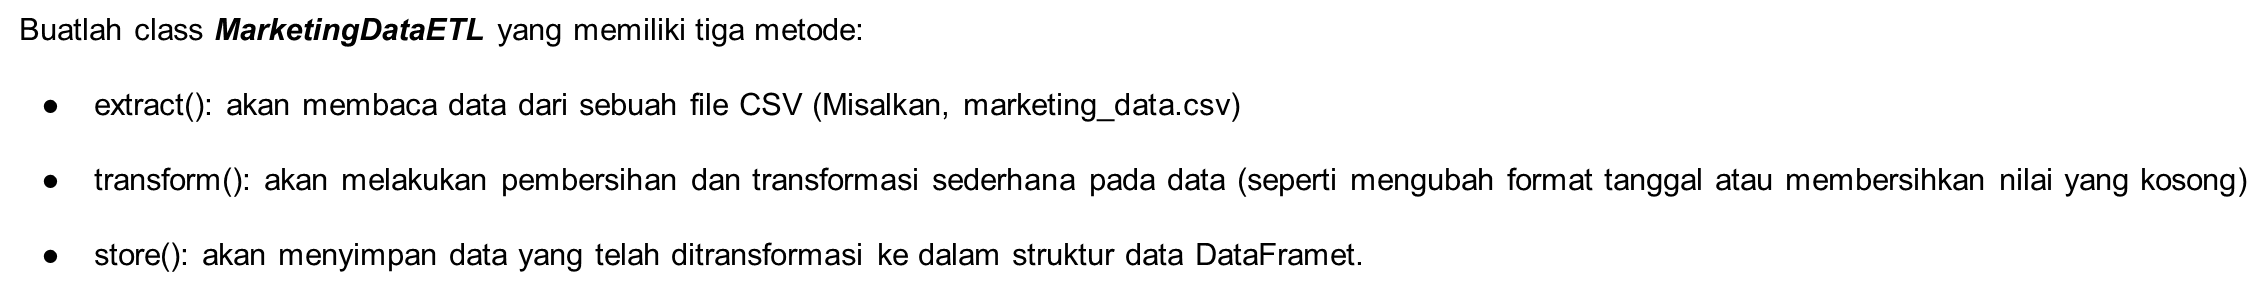

In [3]:
import pandas as pd
from datetime import datetime

class MarketingDataETL:
    def __init__(self):
        self.data = None

    def extract(self, file_path):
        self.data = pd.read_csv(file_path)
        return self.data

    def transform(self):
        # dropna untuk membuang baris yang salah satu isinya kosong
        self.data['purchase_date'] = pd.to_datetime(self.data['purchase_date'], errors='coerce')
        self.data = self.data.dropna().reset_index(drop=True)
        return self.data

    def store(self, transformed_data, store_path):
        transformed_data.to_csv(store_path, index=False)


In [4]:
df= pd.read_csv('marketing_data.csv')
df

,customer_id;purchase_date;product_category;amount_spent
0,C001;01/03/2023;Electronics;250
1,C002;02/03/2023;Books;45.5
2,C003;03/03/2023;Home & Garden;150.75
3,C001;04/03/2023;Books;20
4,C002;05/03/2023;Electronics;525
5,C004;;Electronics;399.99
6,C003;;Books;10.5
7,C005;07/03/2023;Beauty;75


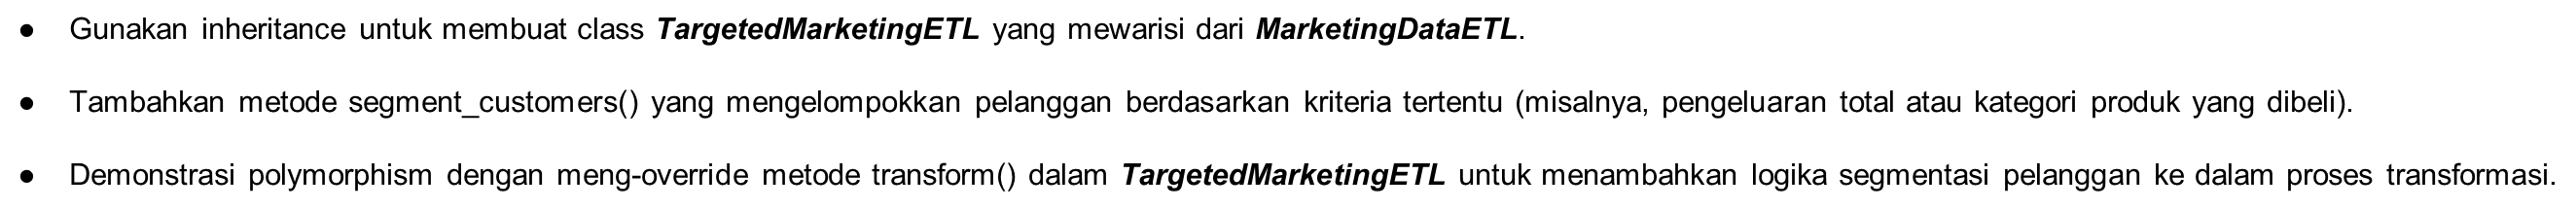

In [5]:
import numpy as np

class MarketingDataETL():
    def __init__(self):
        self.data = pd.read_csv('marketing_data.csv', sep=';')

    def extract(self):
        print("Data Before Transform:")
        print(self.data)
        return self.data

    def transform(self):
        if 'purchase_date' in self.data.columns:
            self.data.dropna(subset=['purchase_date'], inplace=True)
            self.data['purchase_date'] = pd.to_datetime(self.data['purchase_date'], errors='coerce')
            print("Data After Transform:")
            print(self.data)
        return self.data

class TargetedMarketingETL(MarketingDataETL):
    def __init__(self):
        super().__init__()

    def segment_customers(self):
        if self.data is not None:
            conditions = [
                (self.data['amount_spent'] <= 100),
                (self.data['amount_spent'] > 100) & (self.data['amount_spent'] <= 200),
                (self.data['amount_spent'] > 200)
            ]
            choices = ['Low Spending', 'Medium Spending', 'High Spending']
            self.data['spending_segment'] = pd.Series(np.select(conditions, choices), index=self.data.index)
            print("Segmenting Customers Based on Spending:")
            print(self.data)

    def transform(self):
        super().transform()
        self.segment_customers()

    def store_segmented_data(self, output_file_path):
        if self.data is not None:
            try:
                self.data.to_excel(output_file_path, index=False)
                print(f"Segmented Data Successfully Saved To {output_file_path}")
            except Exception as e:
                print(f"Error Saving Segmented Data: {e}")

targeted_marketing_etl = TargetedMarketingETL()
targeted_marketing_etl.extract()
targeted_marketing_etl.transform()
targeted_marketing_etl.store_segmented_data("segmented_data_etl.xlsx")

Data Before Transform:
  customer_id purchase_date product_category  amount_spent
0        C001    01/03/2023      Electronics        250.00
1        C002    02/03/2023            Books         45.50
2        C003    03/03/2023    Home & Garden        150.75
3        C001    04/03/2023            Books         20.00
4        C002    05/03/2023      Electronics        525.00
5        C004           NaN      Electronics        399.99
6        C003           NaN            Books         10.50
7        C005    07/03/2023           Beauty         75.00
Data After Transform:
  customer_id purchase_date product_category  amount_spent
0        C001    2023-01-03      Electronics        250.00
1        C002    2023-02-03            Books         45.50
2        C003    2023-03-03    Home & Garden        150.75
3        C001    2023-04-03            Books         20.00
4        C002    2023-05-03      Electronics        525.00
7        C005    2023-07-03           Beauty         75.00
Segmenting 